In [ ]:
"""
  Name: Hussain Fazal
  Date: 05/10/2020
  File Name: Credit Card Approval

  Description: This file is used to analyse and predict credit card approval.
  Requirements: Change the dataset destination in "data" variable initialisation.
"""

In [54]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tools for analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
# Loading the dataset into pandas data frame
data = pd.read_csv("/datasets/credit_card_australian.csv", header=None)

# Seprating the metadata and the labels (which is the last column)
metadata = data.iloc[:,:-1]
label = data.iloc[:,-1]

# Converting the datatypes to numpy
metadata = metadata.to_numpy()
label = label.to_numpy()

# Spliting the data into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(metadata, label, test_size=0.33, random_state=42)

In [56]:
# Function used for displaying confusion matrix
def display_confusion_matrix(title,cm):
    class_names = ['Rejected','Approved']
    print(title + " Confusion Matrix")
    print(cm)

    normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
    cm_display = ConfusionMatrixDisplay(normed_c,display_labels=class_names).plot(cmap=plt.cm.Blues)
    cm_display.ax_.set_title(title + " Normalized Confusion Matrix:")

# Function used for cross validation
def cross_val(clf, K, metadata, label, title, return_clf = False):
    # scores is used to give average of accuracy
    scores = []
    cv = KFold(n_splits=K)
    avg_cm = np.zeros((2,2))
    
    # K fold analysis, used for spliting the data into k batches
    for train_index, test_index in cv.split(metadata):
      
        X_train, y_train = metadata[train_index], label[train_index]
        X_test, y_test = metadata[test_index], label[test_index]

        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
        avg_cm += confusion_matrix(y_test, clf.predict(X_test))
    
    # Display the average score + Confusion Matrix 
    print(title + " score: ", np.mean(scores))
    display_confusion_matrix(title,avg_cm)
    
    # returns the classifier if needed
    if(return_clf == True):
        return clf

# Function used for parameter tuning
def parameter_tuning(clf, metadata, label, param_grid):
  # Initialising grid search
  grid = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring='accuracy',
                      verbose=1,
                      n_jobs=-1)
  
  # Inputing the data onto the grid search
  grid_result = grid.fit(metadata, label)

  # Displaying the best score with its corrsponding parameters
  print('Best Score: ', grid_result.best_score_)
  print('Best Params: ', grid_result.best_params_)

In [63]:
"""
  Classifiers with their parameters, these variables and parameters
  will be used during parameter tuning and K Fold.
"""
#------------------------------------------------------------------------------#
# Classifier Random Forest with its parameters
classifier_rf = RandomForestClassifier()
param_grid_randomForest = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'max_features' : ['auto', 'sqrt', 'log2']
}

#------------------------------------------------------------------------------#
# Classifier Logistic Regression with its parameters
classifier_lr = LogisticRegression(multi_class='ovr')
param_grid_logisticRegression = {
    'C' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}, 'balanced'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['l1', 'l2']
}

#------------------------------------------------------------------------------#
# Classifier Decision Tree with its parameters
classifier_dt = DecisionTreeClassifier()
param_grid_decisionTree = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'splitter' : ['best', 'random']
}

#------------------------------------------------------------------------------#
# Classifier K-Neighbors with its parameters
classifier_kn = KNeighborsClassifier()
param_grid_KNeighbors = {
    'leaf_size' : list(range(1,50)),
    'n_neighbors' : list(range(1,30)),
    'p' : [1,2]
}

#------------------------------------------------------------------------------#
# Classifier Gaussian Process with its parameters
classifier_gp = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0))
param_grid_GaussianProcess = {
    'optimizer' : ['fmin_l_bfgs_b'],
    'max_iter_predict' : [100, 200, 300]
}

#------------------------------------------------------------------------------#
# Classifier Multi-Layer-Perceptron (MLP) with its parameters
classifier_mlp = MLPClassifier()
param_grid_MLP = {
    'hidden_layer_sizes' : [100, 200, 50],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [100, 200, 300]
}

In [67]:
"""
  Use any of the classifier and the parameters to 
  parameter tune them.
"""

parameter_tuning(classifier_rf, metadata, label, param_grid_randomForest)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 19.7min


Best Score:  0.8710144927536231
Best Params:  {'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 23.7min finished


Random Forest score:  0.8681159420289856
Random Forest Confusion Matrix
[[341.  42.]
 [ 49. 258.]]


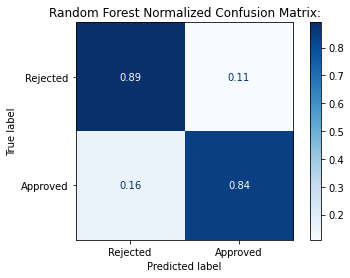

In [68]:
"""
  Use the best parameters and use the 
  cross_val function to get the results.
"""
title = "Random Forest"
K = 5
clf = RandomForestClassifier( max_depth = 80,
                              min_samples_leaf = 4,
                              min_samples_split = 8,
                              n_estimators = 100,
                              max_features = "auto"
                             )

# Calling the cross validation function.
cross_val(clf, K, metadata, label, title, return_clf = False)